# A Simple & Practical Introduction To "*Essential Techniques Of Feature Reduction*"

<img src="header.jpg">

In Machine learning Model, the basic objective is to create a model which is simple, may be less accurate but provide faster result.Complex model tends to overfit resulting in better in-sample error but high out-of-sample error. Feature engineering, feature selection, feature reduction & feature extraction technique helps to create a simple yet powerful model which is trained on optimal number of feature and is quicker in making predictions.


## **Why Feature Reduction?**

**Feature reduction plays a critical role in machine learning pipeline and addresses following problems:**

-	**Multi-collinearity**:- In Multi-collinearity, the independent variables are correlated with each other and the basic approach to predict the dependent or target variable is to have the feature which are correlated with the target variable and uncorrelated with each other. All the independent variable should carry some additional information which defines the target variable.
-	**Curse of Dimensionality/Overfitting**:- When we have a very high no of feature then the target function will become too complex while trying to capture information from all the variables and the derived function may not be the smooth curve. This may lead to an overfitting of model.
-	**Computationally expensive**:- Removing less important features not only make model simple but also reduces the computation time thus saving system resources.
-	Reduces the effectiveness of Machine learning model.

**In high dimensional dataset, Feature reduction techniques helps you in:**
-	Removing less informative feature.
-	Makes computation much more efficient.
-	Make model simple and less prone to overfitting.


**In this blog, we will cover the basic functionality of following dimensionality reduction technique and its implementation in python.**

- PCA
- LDA
- SVD


## <u><b>Principal Component Analysis:</b></u>
The Feature which has more variance are more informative is the underlying principal of PCA working. PCA is an unsupervised statistical method and is based on the covariance matrix analysis. **Covariance matrix** defines how one variable is related to another. Using covariance matrix, eigen vectors & eigen values are computed. PCA creates a new dimension or feature such that maximum variation of the original features is retained. This new dimension is a line which maximizes the variance between features and is called as the **Principal Component**. 
The Equation of the PC can be defined as below:

PC1 = beta1 <b>*</b> X1 + beta2 <b>*</b> X2 Where beta1 & beta2 are called as PCA Loadings.

The direction of maximum variation is determined by the eigenvectors and the data points in the eigen vectors are called as **PCA Loadings** whereas the **eigen value** represents the information in terms of variance within original features.

- The maximum no. of principal components for the dataset will be equal to the no. of available features in the dataset.
- The array of loadings will have the same dimension as the number of original features i.e the no of rows & columns will be equal to the number of original features.

As defined in above equation, PC1 i.e 1st component score is the sum of the product of the actual scaled feature data & PCA loadings of 1st eigen vector.Similarly PC2 score is the sum of the product of feature data & PCA loadings of 2nd eigen vector.

**For each component, we compute the variance using PCA scores and the computed variance is also called as the eigen Value of Principal Component.**

**Explained_variance_ratio** is the ratio of eigen value of each component with sum of eigen values of all components.

<img src="Principal+Component+Analysis.jpg">

**Image Source: Machine Learning Lectures by Prof. Andrew NG at Stanford University**

- As shown in above image, the data points from 2D graph are mapped onto 1D axis such that the maximum variance is attained with the least error.
- Here the **error** is the sum of squares of perpendicular distances of the points to the axis.
- Similarly in case of 3D to 2D, points are mapped on a plane.


I recommend to go through [this good article by Farhad Malik](https://medium.com/fintechexplained/what-are-eigenvalues-and-eigenvectors-a-must-know-concept-for-machine-learning-80d0fd330e47) for more detailed mathematics on eigen vector & eigen values.


### **About the Dataset:**
We will be using built-in iris dataset which can be loaded through sklearn API. **IRIS Dataset** contains the data of 3 classes of iris plant.

Now Lets import the required libraries and load the dataset. In the given dataset, we have 4 independent features.

We will first the scale the dataset using **StandardScaler API** to bring all the variables on the same scale and then we will apply PCA on the scaled data.

In [2]:
#Importing libraries
import pandas as pd # Pandas library to create dataframe
import warnings # To ignore depreciation warning 
warnings.filterwarnings('ignore')
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler # Standard Scaling Library
from sklearn.decomposition import PCA # From Sklearn.decompostion API import PCA 
from sklearn.datasets import load_iris # Loading dataset from sklearn.dataset API
# Magic Function to display plot in code cell
%matplotlib inline 

In [3]:
#loading dataset
iris = load_iris() # loading dataset in iris variable
X = pd.DataFrame(iris.data) # Create DataFrame
X.columns = ['sepal_len', 'sepal_wid', 'petal_len', 'petal_wid'] # Naming column headers
y = iris.target # Loading Dependent or target variable 
from sklearn.model_selection import train_test_split # sklearn API to create random train test subsets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0) # Test_size-0.2 will give create 
#subset of 80:20 ratio i.e 80% Training Set & 20% Test set
X_train.head(3)

,sepal_len,sepal_wid,petal_len,petal_wid
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2


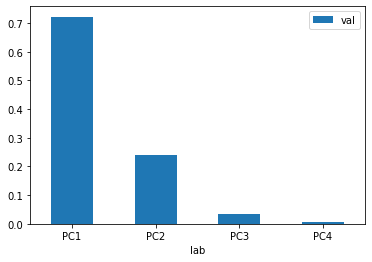

In [21]:
# Scaling the dataset before applying PCA will ensure that the variation from the original components are captured equally.
scaler = StandardScaler() # Creating standard scaler object
X_train_scaled = scaler.fit_transform(X_train) # Scaling train set using fit_transform method
X_test_scaled = scaler.transform(X_test) # Transform test set using the scaler object fitted on train set.
pca = PCA(n_components=4) # Creating pca object with 4 Principal components
pca.fit_transform(X_train_scaled)
pd.DataFrame({'lab':['PC1','PC2','PC3','PC4'],'val':pca.explained_variance_ratio_}).plot.bar(x='lab',y='val',rot=0);

**<u>Points to Remember:</u>**

- **explained_variance_ratio** is used to determine the number of principal components that sufficiently provides the information contained in the original feature.
    - In the above example, >90% of feature variation is explained by first 2 principal components so rest of the 2 principal components can be dropped.
- **n_components** : This parameter can be used to restrict the no. of principal components.
    - For example: In case of 1000's of feature, using n_components parameter we can restrict the no. of features to optimum values by using **explained_variance_ratio_** values.
- **Also, PCA doesn't work well on high dimensional sparse matrix due to computational constraint resulting to a memory error issue.In such cases, TruncatedSVD can be used.**

**Other variant of PCA is also available, <u>KPCA</u> i.e KernelPCA where kernel parameter is passed as an argument. The most used kernel is "rbf" which maps the original feature to Non-linear function as opposed to PCA which is a linear transformation.**

## <u><b>Linear Discriminant Analysis:</b></u>

As the name suggest, LDA is a supervised linear transformation technique.
While mapping the high dimensional feaure to lower dimension, it tries to preserve as much discrimatory power as possible for the dependent variable. Both PCA & LDA are linear technique but PCA doesn't take class label into consideration as oppose to LDA which is based on the approach to maximize the seperation between the different classes.

**To start with, lets take binary class problem.**
- Create a new axis and project the data onto the axis in a way to maximize the seperation between the two classes.
- Compute the mean & variance of both the classes using newly plotted data point.
- Now to maximize the seperation between 2 classes : 
  - The mean of both classes should be as far as possible i.e the difference between the mean should be maximum.
  - The sum of variance of both the classes should be as low as possible i.e lower the value of sum of variance, more compact the data point of each class are & more seperation between the class as well. LDA calls this minimization of variance as scatter.
- The new created axis is called as Linear Discriminant and is the best fit line which maximizes the distance between the mean & minimizes the scatter.

**In case of Multiclass problem, assuming 3 class problem**
- LDA will create two axis which seperates the 3 classes.
- Here it will start with selecting the centriod point for each category.
- LDA will compute the eigen values & eigen vectors for the new plane or axis.
- eigen vectors will define the directionality of the axis and eigen values define the magnitude of the information it carries about the distribution of original data. Lower the values, least information it carries.
- It tries to optimize the linear equation which maximizes the distance between the mean and minimizes the scatter.
  
<u><b>Points to Remember</b></u>  

- **As LDA takes dependent variable into consideration, it may give baised result if the data is not normally distributed.**
- **In LDA, feature scaling does not affect the result of an LDA. So feature scaling is optional.**


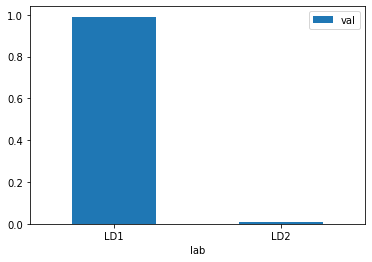

In [39]:
# lets start with importing the required libraries
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda  = LDA(n_components=2)
X_new = lda.fit_transform(X_train,y_train)
pd.DataFrame({'lab':['LD1','LD2'],'val':lda.explained_variance_ratio_}).plot.bar(x='lab',y='val',rot=0);

Shocker
- Here even the single linear discrimant is explaining >95% of variance.

### Lets see LDA Vs PCA

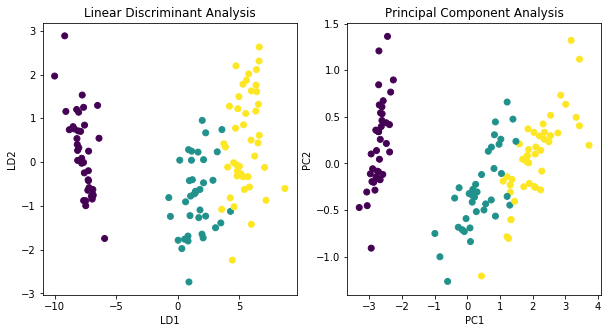

In [20]:
lda_plot = pd.DataFrame(X_new) 
lda_plot[2] = y_train # Adding label column in lda_plot dataframe
plt.figure(figsize=(10,5)) 
plt.subplot(1,2,1)
plt.scatter(lda_plot[0],lda_plot[1],c=lda_plot[2]) # Plotting scatter plot for LD1 vs LD2
plt.title('Linear Discriminant Analysis')
plt.xlabel('LD1')
plt.ylabel('LD2')

pca_plot = pd.DataFrame(pca_mod[:,:2])
pca_plot[2] = y_train
plt.subplot(1,2,2)
plt.scatter(pca_plot[0],pca_plot[1],c=pca_plot[2]) # Plotting scatter plot for PC1 vs PC2
plt.title('Principal Component Analysis')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

- **In PCA Plot, Principal components are defined along the axis with the most variance.**
- **In LDA Plot, Linear Discriminant are defined along the axis to account the most between-class variance.LD1 is sufficiently describing the maximum between-class variance.**

## <u><b>Singular Value Decomposition:</b></u>

Wikipedia Defines SVD as the linear algebraic factorization method of a real or complex matrix.
To us its a yet another method which helps to reduce or decompose the high dimensional matrix.
And this property of SVD is useful in wide variety of applications in signal processing, image compression, image recovery, eigen faces etc.

**Lets see how does SVD achieve it?**
- SVD decompose High Rank A matrix into 3 matrix: U,Σ & V where
    - U & V Vector is an orthonormal vector.
    - Σ Vector is a diagonal matrix of singular values.
- It is presented as below:

<img src="SVD.jpg">

## **Computing of SVD**
- To Compute SVD, we need to compute the **eigen values & eigen vectors** of **Product of Matrix A with its transpose and Product of A Transpose Matrix with Matrix A** as following.
- As derived below:
    - Vector U can be represented by the eigen vectors of Product of Matrix A with its transpose.
    - Vector V can be represented by the eigen vectors of Product of A Transpose Matrix with Matrix A.
    
[Ref: Lecture by Nando de Freitas](https://youtu.be/daHVmoOrLrI)
    
<img src="SVD Computing.jpg">

- **The computed Non-zero singular values of A are the +ve square root of non-zero eigen values.**
- **The diagonal values of Σ represents the variance retained and are always in descending order. (Similar concept as discussed in PCA).**
- **Coming back to Dimensionality Reduction, we can use these values to reduce the dimensionality by considering only the values which explains the maximum variance and by truncating the rest.**
<img src="TruncatedSVD.jpg">

**Lets Code it in Python.**

We will perform Dimensionality Reduction using TruncatedSVD API on the same IRIS Dataset.

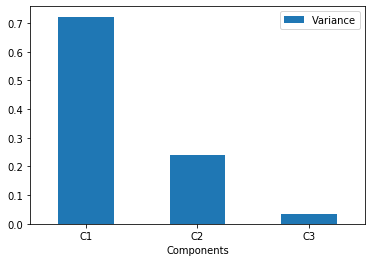

In [38]:
from sklearn.decomposition import TruncatedSVD # Importing TruncatedSVD API from sklearn library
svd = TruncatedSVD(n_components=3) # Defining TruncatedSVD Object
svd.fit_transform(X_train_scaled); # Calling fit_transform method on X_train_scaled Dataset
pd.DataFrame({'Components':['C1','C2','C3'],'Variance':svd.explained_variance_ratio_}).plot.bar(x='Components',y='Variance',rot=0);

**<u>Points to Remember:</u>**

- In TruncatedSVD API, we can pass **n_components** parameter which should be always less than the number of independent features.(In above case, No of features are 4 so n_components should be less than or equal to 3)
- To decide the **n_components** parameter value, we can use scree plot and decide the no. of components which explains the maximum variance.
- TruncatedSVD works efficiently on **Sparse Matrix** as opposed to PCA. Refer sklearn documentation for detailed explaination.
- Apart from TruncatedSVD, we can use **randomized_svd** API from sklearn which approximate truncated singular values decomposition using randomization to speed up the computation.

Finally before concluding, i will touch upon an another SVD based dimentionality reduction technique called as **"LSA"**.

- TruncatedSVD is used in NLP for reducing the Tf-idf (Term Frequency-Inverse document frequency) Matrix.
- Tf-idf respresents the frequency of words in a given document & how rare the words are in corpus.
- Latent Semantics analysis further applies cosine similarity on reduced matrix and the same is used to find the similar documents based on its value (Closer the value to 1 more similar the document).